___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [15]:
# RUN THIS CELL
import os
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse, mse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
rcParams["figure.figsize"] = 12, 5
# Load datasets
dir_data = "/Users/IFLM/Desktop/vsc/training/time_series_python/data"

df = pd.read_csv(
    os.path.join(dir_data, "HospitalityEmployees.csv"), index_col='Date', parse_dates=True
)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

<Axes: xlabel='Date'>

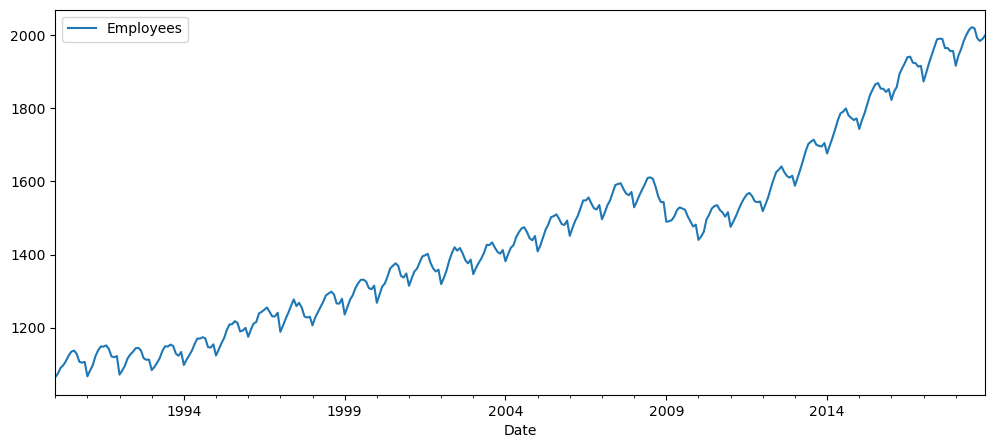

In [3]:
## CODE HERE
df.plot()

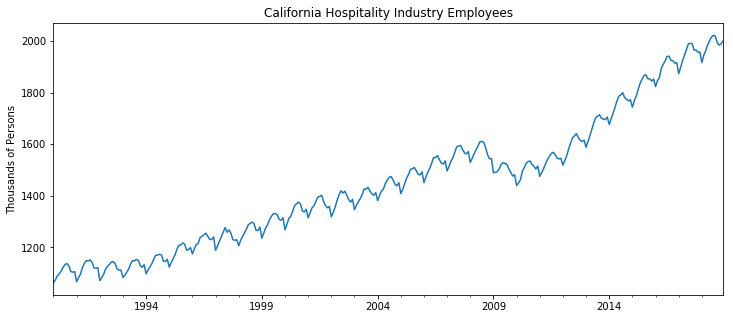

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

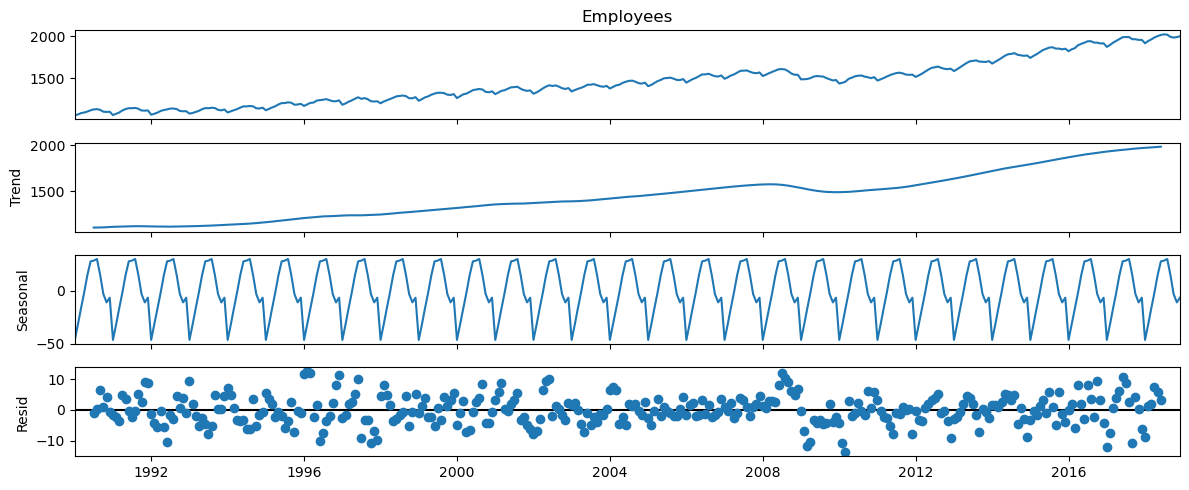

In [6]:
results = seasonal_decompose(df['Employees'], model='add')
results.plot();

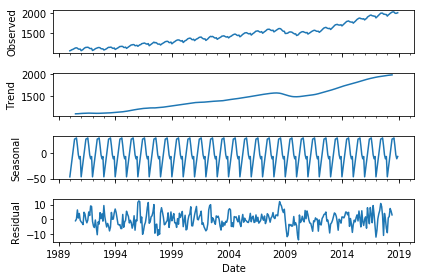

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [7]:
auto_arima(
    df['Employees'],
    seasonal=True,
    m=12
).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 06 Feb 2024   AIC                           2208.504
Time:                                      12:54:44   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.586      0.000       0.836       1.012
ma.L1         -0.9439      0.070    -13.457      0.000      -1.081      -0.806
ma.L2          0.1286      0.060      2.132      0.033       0.010       0.247
ar.S.L12       0.9972      0.001    703.028      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.313      0.000      -0.834      -0.664
sigma2        29.2955      1.716     17.068      0.000      25.931      32.660
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [8]:
nobs = 12
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [17]:
model = SARIMAX(
    train['Employees'],
    order=(1,1,2),
    seasonal_order=(1,0,1,12)
)
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18579D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50451D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91779D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.90541D-03

At iterate   30    f=  3.14944D+00    |proj g|=  8.61411D-03

At iterate   35    f=  3.14898D+00    |proj g|=  3.17153D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Tue, 06 Feb 2024   AIC                           2128.116
Time:                                      12:59:24   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.184      0.000       0.839       1.010
ma.L1         -0.9584      0.070    -13.664      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.465      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    727.038      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.154      0.000      -0.838      -0.666
sigma2        28.7685      1.685     17.075      0.000      25.466      32.071
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# DON'T WRITE HERE

### 6. Obtain predicted values

In [19]:
start = len(train)
end = start + len(test) - 1
fcast = results.predict(start, end, typ='levels').rename('SARIMA')

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

<Axes: xlabel='Date'>

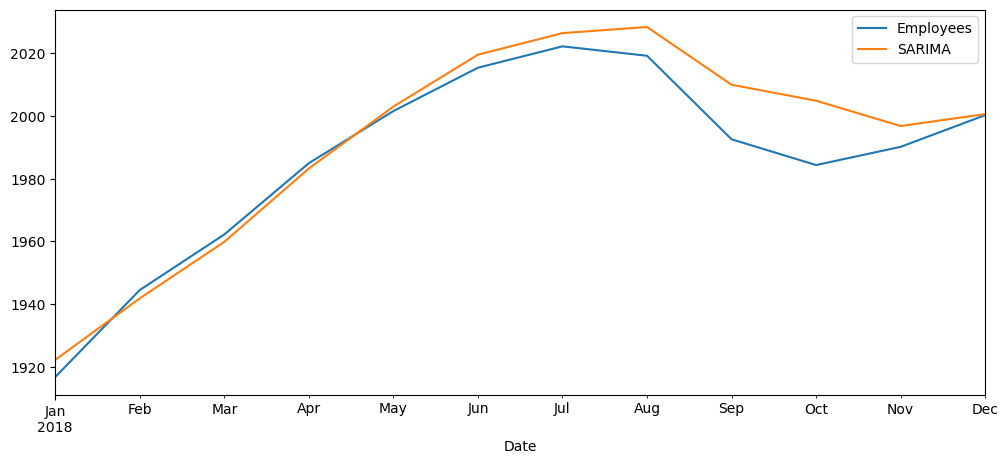

In [20]:
test['Employees'].plot(legend=True)
fcast.plot(legend=True)

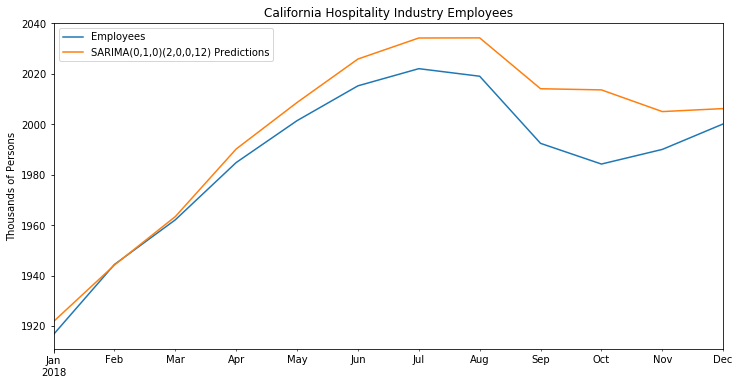

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [21]:
print(mse(test['Employees'], fcast))
print(rmse(test['Employees'], fcast))

77.64593897169368
8.81169330898969


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [22]:
model = SARIMAX(
    df['Employees'],
    order=(1,1,2),
    seasonal_order=(1,0,1,12)
)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80614D+00    |proj g|=  6.97483D+00

At iterate    5    f=  3.81314D+00    |proj g|=  5.08436D-02

At iterate   10    f=  3.27945D+00    |proj g|=  2.33553D-01


 This problem is unconstrained.



At iterate   15    f=  3.18051D+00    |proj g|=  2.98353D-02

At iterate   20    f=  3.15944D+00    |proj g|=  7.75695D-03

At iterate   25    f=  3.15714D+00    |proj g|=  4.63321D-03

At iterate   30    f=  3.15590D+00    |proj g|=  9.84904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     48      1     0     0   1.511D-04   3.156D+00
  F =   3.1558968669022978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 06 Feb 2024   AIC                           2208.504
Time:                                      12:59:46   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.586      0.000       0.836       1.012
ma.L1         -0.9439      0.070    -13.457      0.000      -1.081      -0.806
ma.L2          0.1286      0.060      2.132      0.033       0.010       0.247
ar.S.L12       0.9972      0.001    703.028      0.000       0.994       1.000
ma.S.L12      -0.7489      0.043    -17.313      0.000      -0.834      -0.664
sigma2        29.2955      1.716     17.068      0.000      25.931      32.660
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

<Axes: xlabel='Date'>

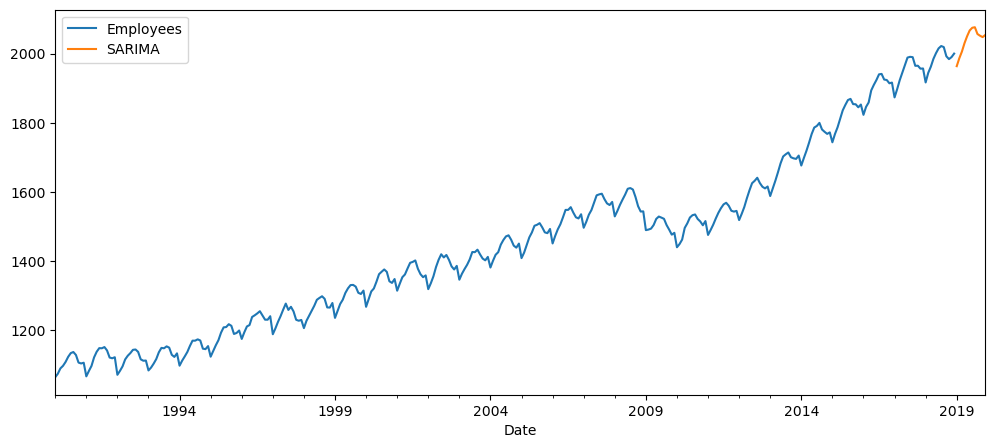

In [23]:
start = len(df)
end = start + 12 - 1
fcast = results.predict(start, end, typ='levels').rename('SARIMA')

df['Employees'].plot(legend=True)
fcast.plot(legend=True)

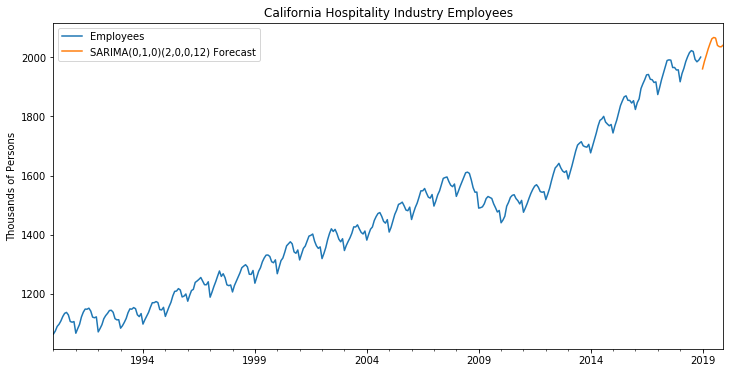

In [11]:
# DON'T WRITE HERE

## Great job!